# Rolling Stone - 500 Greatest Songs Data Extraction, Transformation, and Visualization
In this Jupyter notebook, I will be extracting Rolling Stone’s 500 Greatest Songs data from Dave Tompkin's educational music database (disclaimer at the end of file) utilizing the API BeautifulSoup to then transform and convert it to a dataframe for better understandability and cleanability to get rid of any duplications, noisy entries, and null entries. From there I will assess if there is any need for additional transformations to then finally describe columns and conduct bivariate analysis to attain some influential insights for my final data visualization. Through this, my goal is to determine which artist and genre reoccurred the most in Rolling Stone's 500 Greatest Songs as well as discovering through bivariate analysis if there is any relation between TIME/BPM and BPM/YEAR between the songs in this data.

# 01 DATA EXTRACTION

**IMPORT LIBRARIES**
Here, I am installing and/or importing the libraries I need to execute my code. The code will check if beautifulsoup and pandas were already installed, and if not, it will install it and then import.

In [1]:
try:
    from bs4 import BeautifulSoup
    import pandas
    print ("BeautifulSoup and Pandas are already installed and imported")
except:
    import sys
    !conda install --yes --prefix {sys.prefix} bs4
    !conda install --yes --prefix {sys.prefix} pandas
    from bs4 import BeautifulSoup
    import pandas
    print ("BeautifulSoup and Pandas were not found. Installed them and imported")

import requests

BeautifulSoup and Pandas are already installed and imported


**READ THE WEBPAGE AND PARSE IT WITH BEAUTIFULSOUP**
Next, I am bringing in the webpage where I will be extracting my data and parsing it with the API, BeautifulSoup. The code is initializing a BeautifulSoup object to read and then parsing the webpage read.

In [2]:
opened_webpage = requests.get("https://cs.uwaterloo.ca/~dtompkin/music/list/Best9.html")
print ("Webpage opened successfully...")

bs = BeautifulSoup(opened_webpage.content, "html.parser")
print ("Webpage loaded and parsed successfully...")

Webpage opened successfully...
Webpage loaded and parsed successfully...


**EXTRACT**
Here, I am going into my first main step and extracting the raw data from the table within the website I read and parsed. My code here is defining an empty list where my data will be kept and then finding all the tables in the webpage.

In [3]:
raw_data = []

table = bs.find_all("table")

for row in table:
    line = row.text
    raw_data.append(line)

print(raw_data)

['\nLists :: Best :: Rolling Stone - 500 Greatest Songs\n', "\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n#\n\nARTIST\nTITLE\nTIME\nBPM\nYEAR\nGENRE\nDISC-TRACK\nDETAILS\n\n\n1\nBob Dylan\nLike a Rolling Stone\n 6:04\n 95.6\n1965\nRock 1960s\nPOWERTRK_155-14\n(details...)\n\n\n2\nThe Rolling Stones\nSatisfaction\n 3:43\n134.7\n1985\nRock 1980s\nESSENTLS_012-13\n(details...)\n\n\n3\nJohn Lennon\nImagine\n 3:02\n152.6\n1971\nSlow\nPOWERTRK_023-07\n(details...)\n\n\n4\nMarvin Gaye\nWhat's Going On\n 3:47\n101.5\n1971\nDance 1970s\nPOWERTRK_085-07\n(details...)\n\n\n5\nAretha Franklin\nRespect\n 2:23\n114.5\n1967\nRock 1960s\nPOWERTRK_046-16\n(details...)\n\n\n6\nThe Beach Boys\nGood Vibrations\n 3:36\n148.8\n1966\nRock 1960s\nPOWERTRK_032-08\n(details...)\n\n\n7\nChuck Berry\nJohnny B. Goode\n 2:38\n 84.1\n1958\nRock 1950s\nPOWERTRK_021-12\n(details...)\n\n\n8\nThe Beatles\nHey Jude\n 7:08\n146.9\n1969\nRock 1960s\nBEATLES__BLA-13\n(details...)\n\n\n9\nNirvana\nSmells Like Teen Spirit\n 5:01\n117.5\n199

# 02 DATA TRANSFORMATION AND LOAD

**TRANSFORM**
Following my data extraction, I am now transforming my data that was in the form of a list from my previous step in order to convert it to a data frame. My code here is first defining and storing my column names and then spliting the raw data by "\n\n\n". Then, considering the the final data contains two elements (since it is counting the title), my code discards element 1. From there we make another variable to utilize the previous variable "final_data" in a for-loop to append the split changes to the data then finally converting it to a dataframe and bringing in the column variable from the beginning.

In [4]:
column_names = ["ARTIST", "TITLE",
"TIME","BPM",
"YEAR","GENRE",
"DISC-TRACK", "DETAILS"]

final_data = []

for l in raw_data:
    entries = l.split("\n\n\n")
    final_data.append(entries)

final_data = final_data[1]
final_data =final_data[6:]

super_final_data =[]
for data in final_data:
    split = data.split("\n")
    super_final_data.append(split)

#CONVERT TO DATAFRAME
df = pandas.DataFrame(super_final_data)#,columns=column_names)
df = df.drop([0],axis=1)
df.columns = column_names
df #to get everything you can do df, to get the first 5 rows do df.head()

,ARTIST,TITLE,TIME,BPM,YEAR,GENRE,DISC-TRACK,DETAILS
0,Bob Dylan,Like a Rolling Stone,6:04,95.6,1965,Rock 1960s,POWERTRK_155-14,(details...)
1,The Rolling Stones,Satisfaction,3:43,134.7,1985,Rock 1980s,ESSENTLS_012-13,(details...)
2,John Lennon,Imagine,3:02,152.6,1971,Slow,POWERTRK_023-07,(details...)
3,Marvin Gaye,What's Going On,3:47,101.5,1971,Dance 1970s,POWERTRK_085-07,(details...)
4,Aretha Franklin,Respect,2:23,114.5,1967,Rock 1960s,POWERTRK_046-16,(details...)
...,...,...,...,...,...,...,...,...
496,Weezer,Buddy Holly,2:40,121.2,1994,Rock 1990s,POWERTRK_062-14,(details...)
497,Brook Benton,Rainy Night in Georgia,3:59,137.3,1970,Slow,POWERTRK_083-18,(details...)
498,Thin Lizzy,The Boys Are Back in Town,4:28,120.6,1976,Rock 1970s,POWERTRK_057-09,(details...)
499,Boston,More Than a Feeling,4:45,109.0,1976,Rock 1970s,POWERTRK_023-03,(details...)


**DUPLICATION CHECKS AND CLEANING**
In order to clean up my dataframe a bit, my code is checking if there were any duplicate rows within my dataframe. In result there was 0 and therefore no need for any code to remove duplicates.

In [5]:
number_of_duplicates = df.duplicated().sum()
print (f" Number of duplicates : {number_of_duplicates}")

 Number of duplicates : 0


**INSPECTING DATA AND CHECKING NOISY ENTRIES**
For further cleaning, my code here is inspecting the information from my dataframe to help in idenifying any noisy entries.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501 entries, 0 to 500
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ARTIST      500 non-null    object
 1   TITLE       500 non-null    object
 2   TIME        500 non-null    object
 3   BPM         500 non-null    object
 4   YEAR        500 non-null    object
 5   GENRE       500 non-null    object
 6   DISC-TRACK  500 non-null    object
 7   DETAILS     500 non-null    object
dtypes: object(8)
memory usage: 31.4+ KB


**DELETING ROWS WITH NULL ENTRIES**
Based on inspecting the output from the previous step, it is clear that the data has 501 rows overall, but 500 non-null entries. Therefore, in this step my code will delete the row with NULL entries.

In [7]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ARTIST      500 non-null    object
 1   TITLE       500 non-null    object
 2   TIME        500 non-null    object
 3   BPM         500 non-null    object
 4   YEAR        500 non-null    object
 5   GENRE       500 non-null    object
 6   DISC-TRACK  500 non-null    object
 7   DETAILS     500 non-null    object
dtypes: object(8)
memory usage: 35.2+ KB


**ADDITIONAL TRANSFORMATIONS**
Here, I am making some final tranformations in order to compare columns within my data later on, such as transforming a string column ("TIME") to a float. My code here is first defining a function for cleaning that will replace the colon (:) in my "TIME" column to a period (.), and then calling that function to the dataframe below. In order to confirm these changes, my code then prints out the first five rows of the dataframe using .head() where it can be seen under the "TIME" column that the colons were replaced by periods.

In [8]:
def clearn_string_and_convert(s):
    s = s.replace(":",".")
    converted = float(s)
    return converted

df["TIME"] = df["TIME"].apply(clearn_string_and_convert)

df.head()

C:\Users\yesen\AppData\Local\Temp\ipykernel_9980\1578338858.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["TIME"] = df["TIME"].apply(clearn_string_and_convert)


,ARTIST,TITLE,TIME,BPM,YEAR,GENRE,DISC-TRACK,DETAILS
0,Bob Dylan,Like a Rolling Stone,6.04,95.6,1965,Rock 1960s,POWERTRK_155-14,(details...)
1,The Rolling Stones,Satisfaction,3.43,134.7,1985,Rock 1980s,ESSENTLS_012-13,(details...)
2,John Lennon,Imagine,3.02,152.6,1971,Slow,POWERTRK_023-07,(details...)
3,Marvin Gaye,What's Going On,3.47,101.5,1971,Dance 1970s,POWERTRK_085-07,(details...)
4,Aretha Franklin,Respect,2.23,114.5,1967,Rock 1960s,POWERTRK_046-16,(details...)


**DESCRIBING COLUMNS**
Now that our data is fully extracted, transformed, and cleaned, we can describe the colummns in order to inspect and gain any insights that may contribute to or influence our final data visualizations. I will also come back to this in step 03 ANALYSIS: SUMMARY AND VISUALIZATIONS to note further insights.

In [9]:
df["ARTIST"].describe()

count             500
unique            239
top       The Beatles
freq               23
Name: ARTIST, dtype: object

In [10]:
df["TITLE"].describe()

count                  500
unique                 497
top       Blue Suede Shoes
freq                     2
Name: TITLE, dtype: object

In [11]:
df["TIME"].describe()

count    500.000000
mean       3.469660
std        1.424447
min        1.490000
25%        2.407500
50%        3.160000
75%        4.280000
max       11.420000
Name: TIME, dtype: float64

In [12]:
df["BPM"].describe()

count       500
unique      362
top       105.5
freq          5
Name: BPM, dtype: object

In [13]:
df["YEAR"].describe()

count      500
unique      54
top       1969
freq        30
Name: YEAR, dtype: object

In [14]:
df["GENRE"].describe()

count     500
unique     17
top       TBD
freq      151
Name: GENRE, dtype: object

**LOAD**
Finally, we take our finished data and load it to a CSV format to utilize it in the final major step being visualization. This code will store the DataFrame table that I created on my local disk so that I can use it later.

In [15]:
df.to_csv("Rolling_Stone_500_Greatest_Songs.csv")

# 03 ANALYSIS: SUMMARY AND VISUALIZATIONS

**INSTALL AND IMPORT LIBRARIES**
Similar to the installation and/or import from the first step in 01 DATA EXTRACTION, here I am also installing and/or importing pandas, numpy/scipy, and matplotlib in order to deal with Tablular data, access a library for statistical analysis and plot data.

In [16]:
# Check if beautifulsoup and pandas are already installed
# If not, install it and then import
try:
    import pandas as pd
    import numpy as np
    import scipy
    from matplotlib import pyplot as plt
    print ("Imported all libraries successfully...")
except:
    import sys
    !conda install --yes --prefix {sys.prefix} numpy
    !conda install --yes --prefix {sys.prefix} pandas
    !conda install --yes --prefix {sys.prefix} matplotlib
    !conda install --yes --prefix {sys.prefix} scipy
    print ("Some libraries not found, installing...")

Imported all libraries successfully...


**LOAD THE DATA COLLECTED**
Here, we are reading the CSV file of our data that we had previously loaded in the final step of 02 TRANSFORMATION AND LOAD. However, before starting, I had to tell jupyter not to ignore any output that is supposed to be printed.

In [17]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

rolling_stone_df = pd.read_csv("Rolling_Stone_500_Greatest_Songs.csv")

rolling_stone_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  500 non-null    int64  
 1   ARTIST      500 non-null    object 
 2   TITLE       500 non-null    object 
 3   TIME        500 non-null    float64
 4   BPM         500 non-null    float64
 5   YEAR        500 non-null    int64  
 6   GENRE       500 non-null    object 
 7   DISC-TRACK  500 non-null    object 
 8   DETAILS     500 non-null    object 
dtypes: float64(2), int64(2), object(5)
memory usage: 35.3+ KB


**PRINT A FEW ROWS**
In orded to ensure the data is still correct within the CSV file, my code below prints a few rows (5) in order for me to inspect and confirm to proceed with the next steps.

In [18]:
rolling_stone_df.head()

,Unnamed: 0,ARTIST,TITLE,TIME,BPM,YEAR,GENRE,DISC-TRACK,DETAILS
0,0,Bob Dylan,Like a Rolling Stone,6.04,95.6,1965,Rock 1960s,POWERTRK_155-14,(details...)
1,1,The Rolling Stones,Satisfaction,3.43,134.7,1985,Rock 1980s,ESSENTLS_012-13,(details...)
2,2,John Lennon,Imagine,3.02,152.6,1971,Slow,POWERTRK_023-07,(details...)
3,3,Marvin Gaye,What's Going On,3.47,101.5,1971,Dance 1970s,POWERTRK_085-07,(details...)
4,4,Aretha Franklin,Respect,2.23,114.5,1967,Rock 1960s,POWERTRK_046-16,(details...)


**DESCRIPTIVE STATS USING DF.DESCRIBE() METHOD**
As shown previously in the final phases of 02 DATA TRANSFORMATION AND LOAD, we can describe the colummns in order to inspect and gain any insights that may contribute to or influence our final data visualizations. However, here we can just decribe the columns we plan on working with based on what we inspected previously.

In [19]:
df["ARTIST"].describe()

count             500
unique            239
top       The Beatles
freq               23
Name: ARTIST, dtype: object

Insights: The Beatles was the most frequent artist that reoccured within Rolling Stones 500 Greatest Songs data with a reoccurence count of 23 times.

In [20]:
df["GENRE"].describe()

count     500
unique     17
top       TBD
freq      151
Name: GENRE, dtype: object

Insights: Although after graphing Genre it is evident that Rock 1960s reoccured the most within Rolling Stones 500 Greatest Songs data, a flaw within the dataset itself is having the information gap of all the songs not having their dedicated genre and instead having 151 datapoints be labeled as TBD (or to be determined).

In [21]:
df["TIME"].describe()

count    500.000000
mean       3.469660
std        1.424447
min        1.490000
25%        2.407500
50%        3.160000
75%        4.280000
max       11.420000
Name: TIME, dtype: float64

Insights: Although the range of the time or song length within the data set was [1.4, 11.4], the mean time was 3.4 minutes long. This shows that most songs that were ranked in Rolling Stones 500 Greatest Songs tended to be on the shorter side of the spectrum.

**BIVARIATE ANALYSIS**
Here, I will utilize bivariate analysis to study the association between two columns (i.e., two variables). For this I will compute the Pearson correlction coefficient between time/BPM, BPM/year, and time/year.

In [22]:
from scipy.stats import pearsonr

p = pearsonr(rolling_stone_df["TIME"],rolling_stone_df["BPM"]) #could use scatterplot
print (p[0])

-0.014028428803589739


Insights: The corelation coefficient being ~-0.014 demonstrates that time and BPM are NOT strongely coorelated, which is expected. However, a negative correlation shows that while one of the variable increases, the other decreases.

In [23]:
from scipy.stats import pearsonr

p = pearsonr(rolling_stone_df["BPM"],rolling_stone_df["YEAR"]) #could use scatterplot
print (p[0])

0.0013826606134755611


Insights: The corelation coefficient being ~0.001 demonstrates that BPM and year are NOT strongely coorelated, which is expected.

In [24]:
from scipy.stats import pearsonr

p = pearsonr(rolling_stone_df["TIME"],rolling_stone_df["YEAR"]) #use scatterplot
print (p[0])

0.3005574932893641


Insights: Although I conducted this last analysis based on curiosity and the corelation coefficient being 0.300 demonstrates that TIME and YEAR are NOT strongely coorelated (which is expected), I thought it was interesting how it had a stronger correlation than time and beats per minute being that they may have a higher chance of being correlated than time and year.

# 3.1 FINAL DATA VISUALIZATIONS

**My first data visualization is a bar graph that identifies which artist reoccurred the most in Rolling Stone's 500 Greatest Songs.**
My code here is setting the size of the graph as well as the labels that are both on the x and y-axis. Further below, my code is setting the title for the overall graph and for the categories the values on the x and y-axis land on, allowing for different rotation placement and size.

<AxesSubplot:xlabel='ARTIST'>

Text(0.5, 0.98, "Frequency of Artist Occurence in Rolling Stone's 500 Greatest Songs")

Text(0.5, 0, 'Artist')

Text(0, 0.5, 'Frequency')

[Text(0, 0, 'The Beatles'),
 Text(1, 0, 'The Rolling Stones'),
 Text(2, 0, 'Bob Dylan'),
 Text(3, 0, 'Elvis Presley'),
 Text(4, 0, 'The Beach Boys'),
 Text(5, 0, 'Jimi Hendrix'),
 Text(6, 0, 'James Brown'),
 Text(7, 0, 'Sly & The Family Stone'),
 Text(8, 0, 'Prince'),
 Text(9, 0, 'Chuck Berry'),
 Text(10, 0, 'U2'),
 Text(11, 0, 'Led Zeppelin'),
 Text(12, 0, 'Little Richard'),
 Text(13, 0, 'Buddy Holly'),
 Text(14, 0, 'Elton John'),
 Text(15, 0, 'The Who'),
 Text(16, 0, 'The Clash'),
 Text(17, 0, 'Ray Charles'),
 Text(18, 0, 'Creedence Clearwater Revival'),
 Text(19, 0, 'Al Green'),
 Text(20, 0, 'Stevie Wonder'),
 Text(21, 0, 'Marvin Gaye'),
 Text(22, 0, 'Aretha Franklin'),
 Text(23, 0, 'Four Tops'),
 Text(24, 0, 'David Bowie'),
 Text(25, 0, 'Nirvana'),
 Text(26, 0, 'Muddy Waters'),
 Text(27, 0, 'Roy Orbison'),
 Text(28, 0, 'Bob Marley & The Wailers'),
 Text(29, 0, 'Sam Cooke'),
 Text(30, 0, 'The Drifters'),
 Text(31, 0, 'Everly Brothers'),
 Text(32, 0, 'The Temptations'),
 Text(33, 0, 

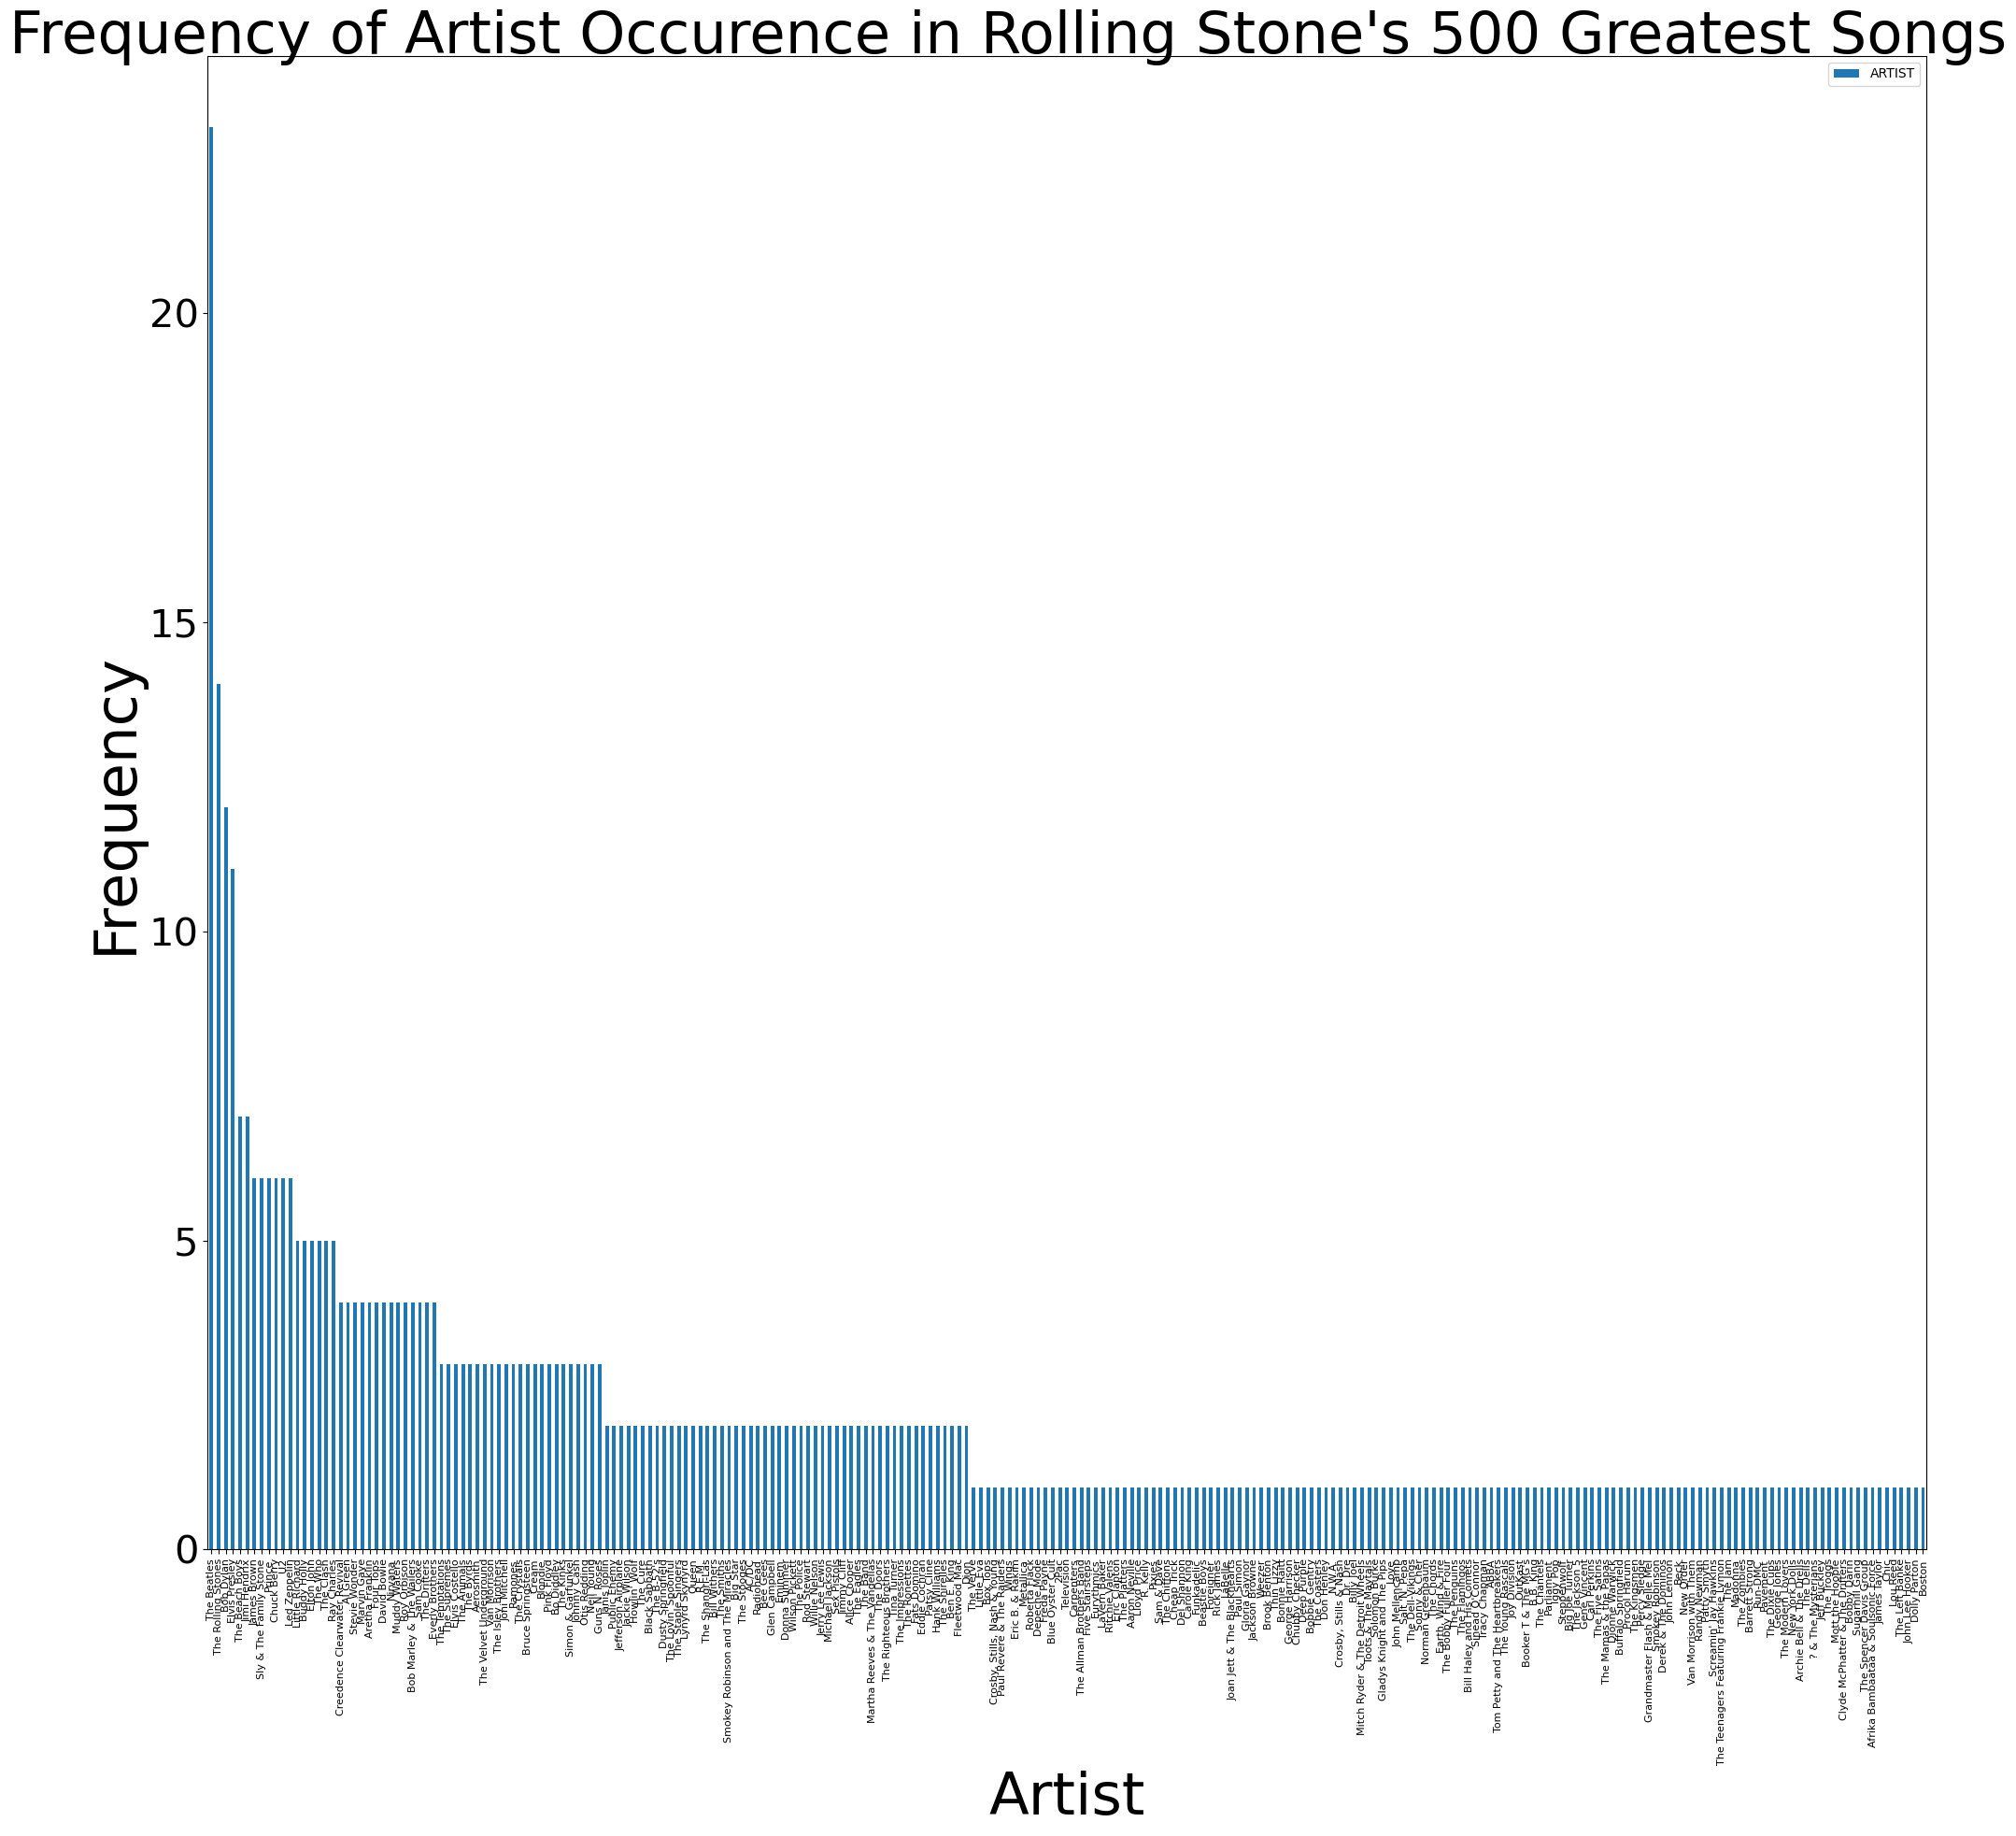

In [25]:
plt.rcParams['figure.figsize'] = [20,20]
plt.rcParams['figure.autolayout'] = True

plt.rc('xtick', labelsize = 8)
plt.rc('ytick', labelsize = 30)

fig, ax = plt.subplots()

df['ARTIST'].value_counts().plot(ax=ax, kind='bar', xlabel='ARTIST')

fig.suptitle('Frequency of Artist Occurence in Rolling Stone\'s 500 Greatest Songs', fontsize = 45)
plt.xlabel('Artist', fontsize = 45)
plt.ylabel('Frequency', fontsize = 45)
plt.legend()

ax.set_xticklabels(labels = df['ARTIST'].value_counts().index, rotation = 90)
plt.show()

INSIGHTS: Similar to the describe method insights, this bar graph shows that The Beatles was the most frequent artist that reoccured within Rolling Stones 500 Greatest Songs data with a reoccurence count of 23 times. Followed by three very close runner ups being (in order) The Rolling Stones (14 times), Bob Dylan (12 times), and Elvis Presely (11 times) and then dropping down to The Beach Boys where all following artists follow in difference almost evenly.

**My second data visualization is a bar graph that identifies which genre reoccurred the most in Rolling Stone's 500 Greatest Songs.**
Exactly laid out as the last graph but just replaced with a different category, my code here is setting the size of the graph as well as the labels that are both on the x and y-axis. Further below, my code is setting the title for the overall graph and for the categories the values on the x and y-axis land on, allowing for different rotation placement and size.

<AxesSubplot:xlabel='GENRE'>

Text(0.5, 0.98, "Frequency of Genre Occurence in Rolling Stone's 500 Greatest Songs")

Text(0.5, 0, 'Genre')

Text(0, 0.5, 'Frequency')

[Text(0, 0, 'TBD'),
 Text(1, 0, 'Rock 1960s'),
 Text(2, 0, 'Slow'),
 Text(3, 0, 'Rock 1970s'),
 Text(4, 0, 'Rock 1980s'),
 Text(5, 0, 'Rock 1950s'),
 Text(6, 0, 'Rock 1990s'),
 Text(7, 0, 'Dance 1960s'),
 Text(8, 0, 'Country'),
 Text(9, 0, 'Dance 1980s'),
 Text(10, 0, 'Disco'),
 Text(11, 0, 'Dance 1970s'),
 Text(12, 0, 'Easy'),
 Text(13, 0, 'Reggae'),
 Text(14, 0, 'R&B 1980s'),
 Text(15, 0, 'R&B 1990s'),
 Text(16, 0, 'Rock 2000s')]

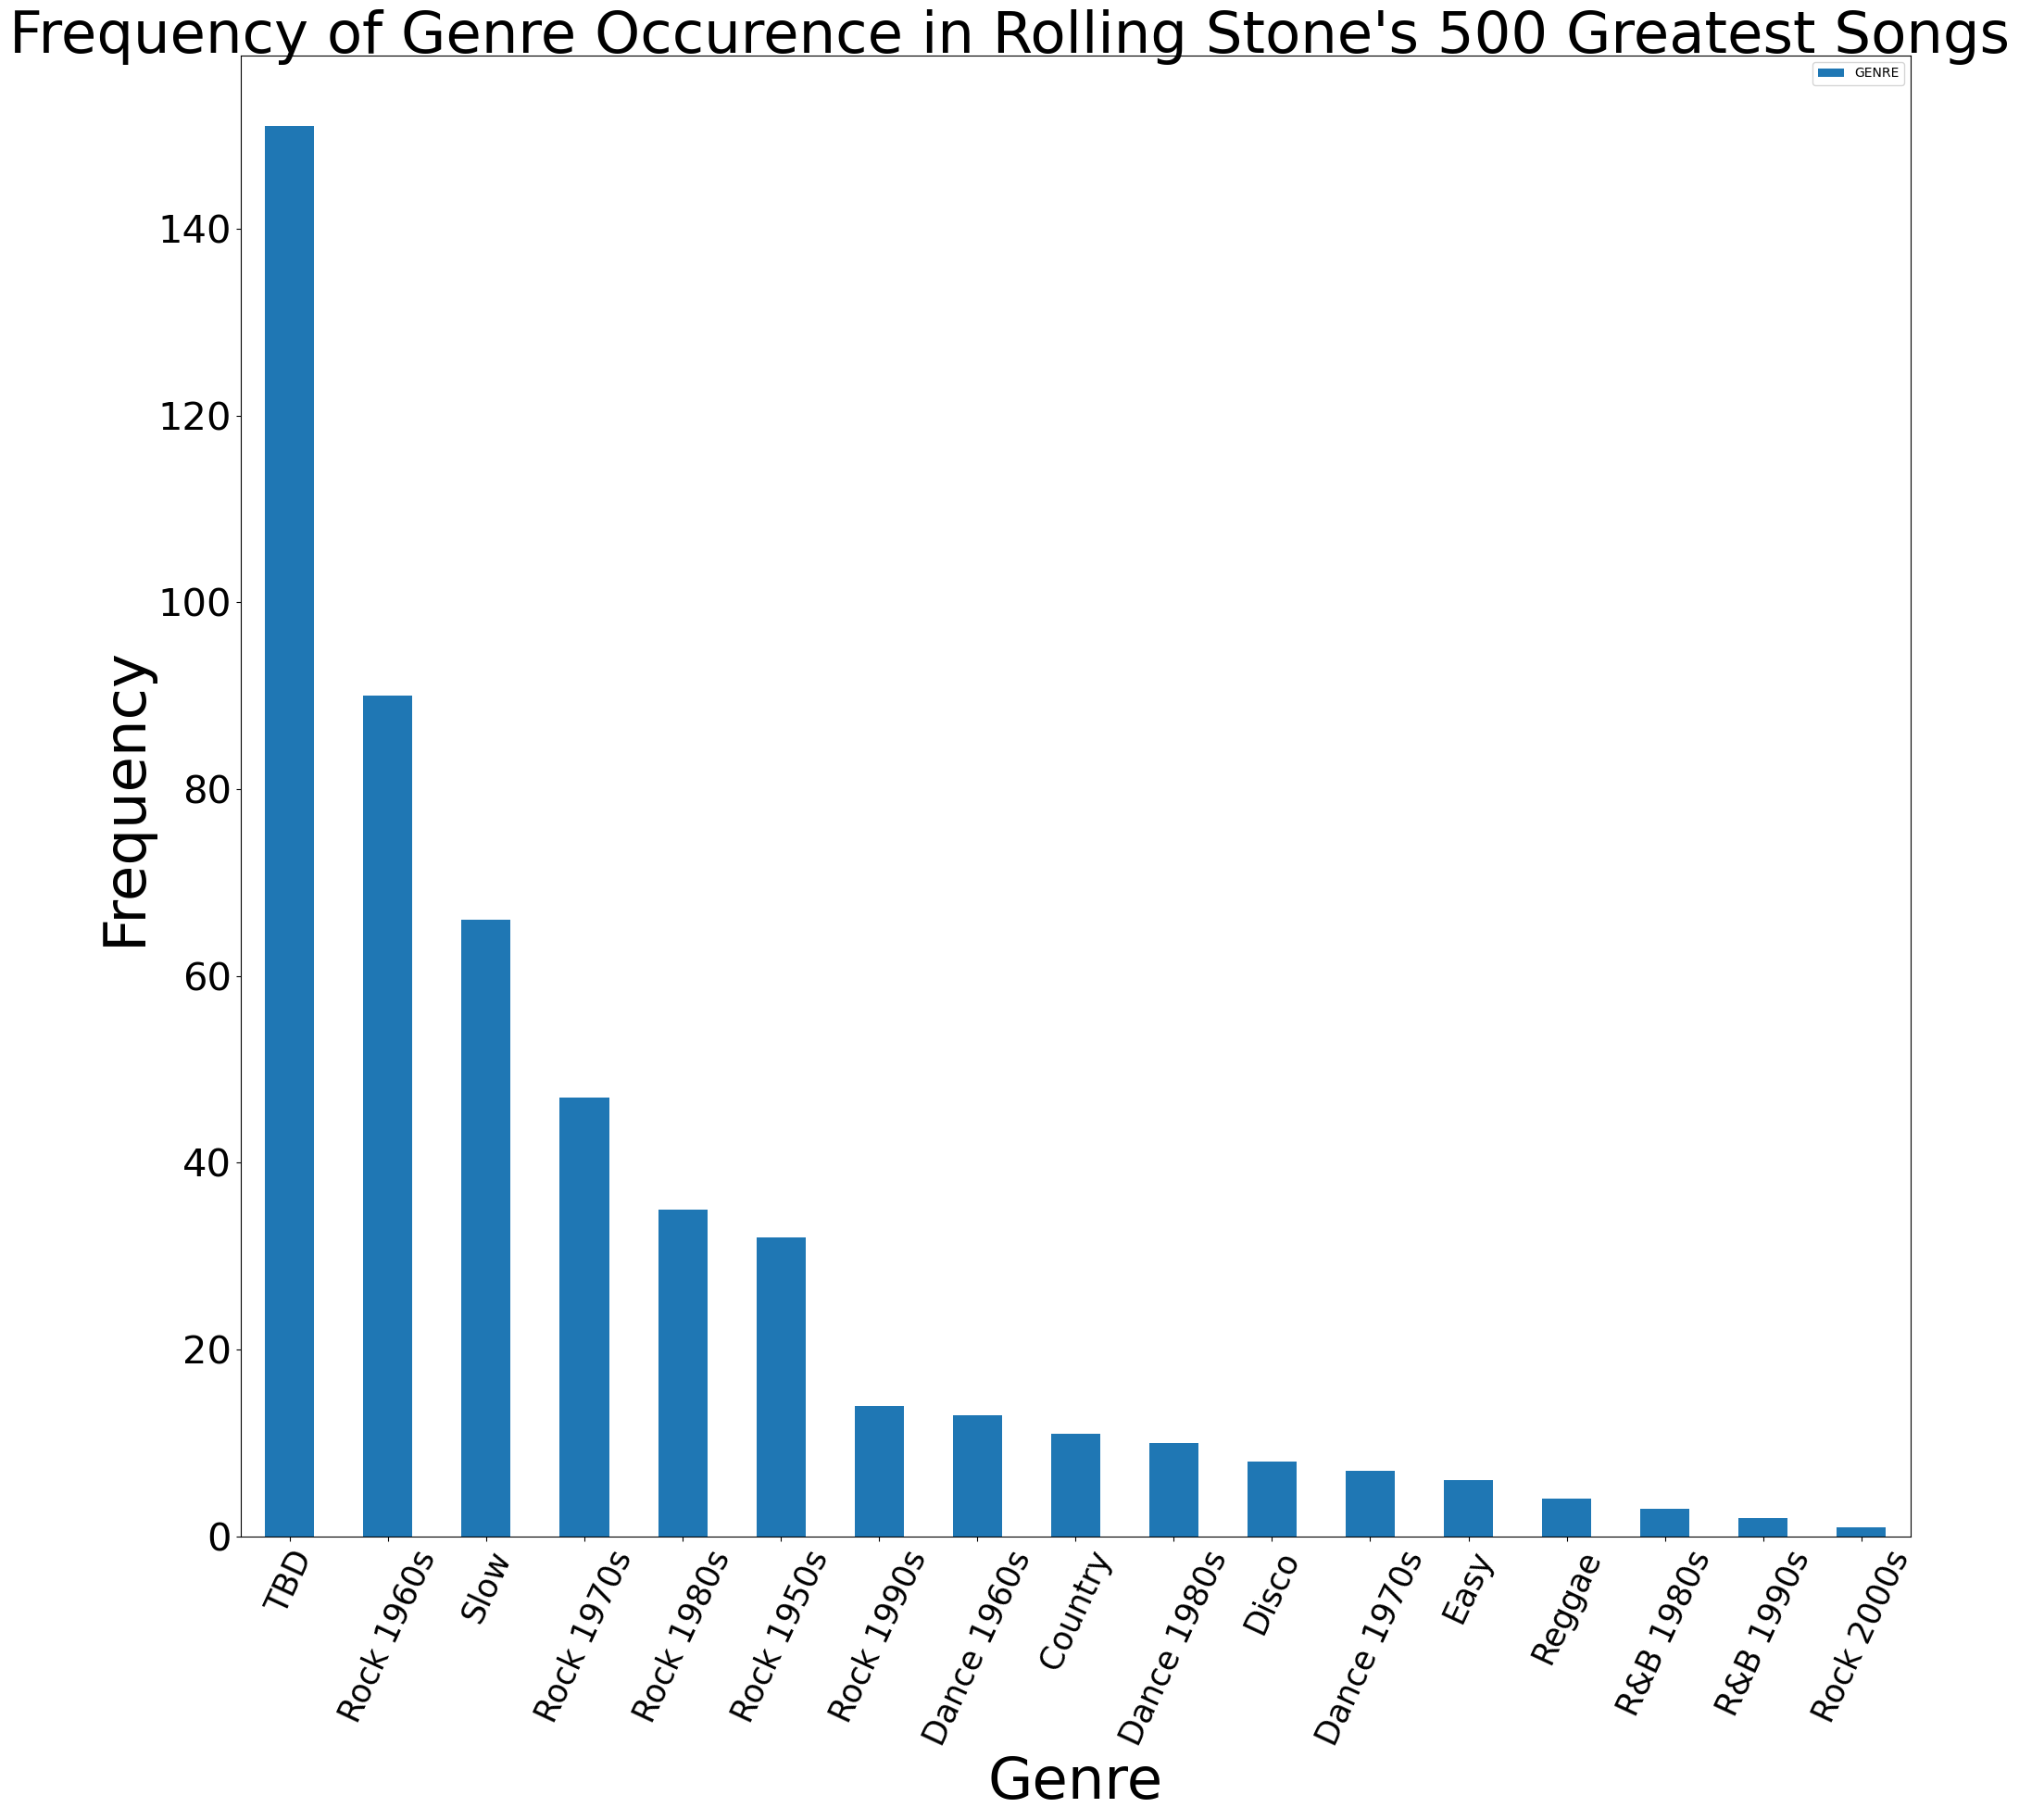

In [26]:
plt.rcParams['figure.figsize'] = [20,20]
plt.rcParams['figure.autolayout'] = True

plt.rc('xtick', labelsize = 25)
plt.rc('ytick', labelsize = 30)

fig, ax = plt.subplots()

df['GENRE'].value_counts().plot(ax=ax, kind='bar', xlabel='GENRE')

fig.suptitle('Frequency of Genre Occurence in Rolling Stone\'s 500 Greatest Songs', fontsize = 45)
plt.xlabel('Genre', fontsize = 45)
plt.ylabel('Frequency', fontsize = 45)
plt.legend()

ax.set_xticklabels(labels = df['GENRE'].value_counts().index, rotation = 65)
plt.show()

INSIGHTS: Similar to the describe method insights, this bar graph shows that the genre that reoccured the most within Rolling Stone's 500 Greatest Songs was "Rock 1960s" However, I purposefully left the "TBD" labeling orignially in the data in order to highlight the gap within the data and show that although "Rock 1960s" would be considered the highestest reoccuring value, it cannot be certain once the "TBD" labels are idenitifed and spread to see the actual final difference in the data's genre values. Acknowledging this fact, we can also determine that "Rock 2000s" was the genre that reoccured the least.

**NOTE:** Although I was initially planning to plot two scatterplots, one that identifies if there was a relation between the "TIME" and the "BPM", and another that identifies if there was a relation between the "BPM" and the "YEAR," I discovered through my bivariate anaylsis that both relationships do not have any correlation with each other and therefore doesn't provide much helpful insights in comparison to how frequently an artist or genre occured within Rolling Stone's 500 Greatest Songs.

**DISCLAIMER:**  
Data License:  
I, YESENIA GARCIA, DO NOT CLAIM OWNERSHIP OF THE DATA PROVIDED. ALL CREDITS GO TO THE ORIGINATOR, CREATOR, AND OWNER OF THE MUSIC DATABASE:  
Dave Tompkins  
Continuing Lecturer  
Associate Director of Undergraduate Studies  
David R. Cheriton School of Computer Science  
Faculty of Mathematics  
University of Waterloo  
Dave Tompkins Link: https://cs.uwaterloo.ca/~dtompkin/index.html  
Dave Tompkins Music Database Link: https://cs.uwaterloo.ca/~dtompkin/music/index.html  

My handling of this data is strictly for EDUCATIONAL PURPOSES ONLY for a course project in I310D at The University of Texas at Austin by extracting, transforming, and distributing the data (including in data.world) to create an informative graph. This data is NOT FOR COMMERICAL PURPOSES, as stated in Dave Tompkins music database website:  
"Please note that this is an educational and recreational website, not a commercial website:  
- I do not sell music  
- I do not download music  
- I do not distribute my music"  

To reiterate, considering that Dave Tompkin's music database website did not list a license, the handling and usage of this data is strictly only for non-commerical purposes. I am releasing this data as a part of an academic project, and therefore for an educational purpose and not commerical use. Therefore, this data may only be used for educational purposes and non-commercial purposes with attributions or credit to the author and creator, Dave Tompkins. However, if you are wanting to use this data for commerical application, contact the author of the website, Dave Tompkins.